### Libraries

In [2]:
#!pip install tensorflow

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached grpcio-1.50.0-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.14.1-py2.py3-none-any.whl (175 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [4]:
%matplotlib inline

import os
import zipfile

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image




### Unzip the file

In [5]:
local_zip = '.\cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('\cats_and_dogs_filtered')
zip_ref.close()


In [6]:
root = '/cats_and_dogs_filtered'
exclude = ["PetImages/Cat/666.jpg", "PetImages/Dog/11702.jpg"]
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['/cats_and_dogs_filtered\\cats_and_dogs_filtered', '/cats_and_dogs_filtered\\cats_and_dogs_filtered\\train', '/cats_and_dogs_filtered\\cats_and_dogs_filtered\\train\\cats', '/cats_and_dogs_filtered\\cats_and_dogs_filtered\\train\\dogs', '/cats_and_dogs_filtered\\cats_and_dogs_filtered\\validation', '/cats_and_dogs_filtered\\cats_and_dogs_filtered\\validation\\cats', '/cats_and_dogs_filtered\\cats_and_dogs_filtered\\validation\\dogs']


#### This function is useful for pre-processing the data into an image and input vector.

In [7]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Load all the images from root folder

In [8]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

Randomize the data order

In [9]:
random.shuffle(data)

create training / validation / test split (70%, 15%, 15%)

In [10]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Separate data for labels.

In [11]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 4, 1, 4, 5, 0, 4, 1, 3, 0, 3, 1, 0, 1, 3, 2, 0, 0, 1, 3, 1, 5, 0, 2, 5, 2, 4, 4, 0, 4, 2, 1, 2, 3, 4, 1, 5, 1, 5, 3, 6, 3, 5, 0, 0, 2, 4, 2, 5, 1, 3, 3, 3, 1, 1, 0, 0, 6, 1, 5, 0, 1, 0, 1, 0, 0, 2, 5, 1, 0, 0, 0, 3, 0, 1, 0, 4, 5, 0, 3, 2, 5, 1, 4, 0, 1, 3, 5, 0, 1, 2, 3, 2, 2, 0, 6, 6, 2, 3, 0, 4, 2, 5, 5, 6, 0, 0, 4, 2, 0, 0, 0, 5, 0, 0, 5, 3, 0, 0, 0, 1, 2, 0, 4, 4, 0, 3, 3, 2, 5, 0, 0, 2, 4, 6, 0, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 3, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 4, 0, 1, 2, 4, 2, 3, 1, 1, 0, 0, 3, 1, 0, 2, 2, 1, 1, 5, 0, 5, 1, 0, 2, 0, 1, 4, 0, 0, 3, 4, 6, 3, 3, 0, 1, 2, 4, 1, 0, 0, 1, 6, 0, 1, 1, 1, 4, 0, 0, 4, 3, 1, 3, 3, 2, 0, 4, 3, 0, 5, 3, 0, 0, 0, 0, 2, 1, 1, 0, 4, 5, 1, 0, 4, 6, 0, 5, 0, 0, 4, 0, 0, 0, 1, 4, 4, 3, 0, 0, 5, 3, 0, 0, 0, 0, 0, 1, 3, 3, 4, 4, 2, 5, 1, 2, 2, 6, 2, 0, 6, 0, 1, 0, 4, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 2, 0, 0, 5, 1, 1, 5, 3, 2, 4, 1, 5, 6, 1, 3, 5, 0, 3, 1, 5, 3, 2, 6, 5, 0, 3, 6, 1, 0, 0, 4, 0, 

Pre-process the data as before by making sure it's float32 and normalized between 0 and 1.

In [12]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(1350, 7)


#### Let's get a summary of what we have.

In [13]:
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 9000 images from 7 categories
train / validation / test split: 6300, 1350, 1350
training data shape:  (6300, 224, 224, 3)
training labels shape:  (6300, 7)


Notice that we divided all the data into three subsets -- a training set `train`, a validation set `val`, and a test set `test`. The reason for this is to properly evaluate the accuracy of our classifier. During training, the optimizer uses the validation set to evaluate its internal performance, in order to determine the gradient without overfitting to the training set. The `test` set is always held out from the training algorithm, and is only used at the end to evaluate the final accuracy of our model.

Let's quickly look at a few sample images from our dataset.

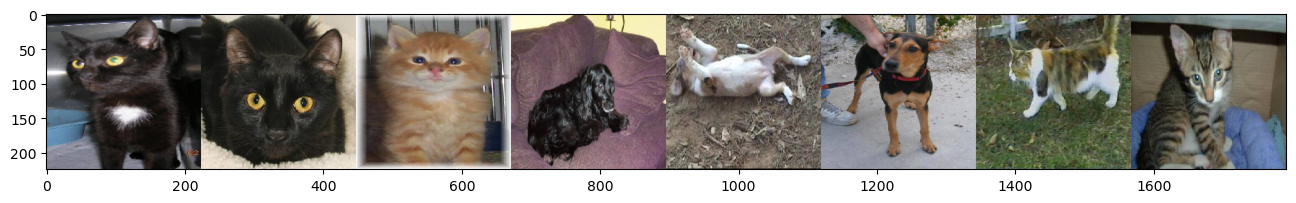

In [14]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

### First training a neural net from scratch

Before doing the transfer learning, let's first build a neural network from scratch for doing classification on our dataset. This will give us a baseline to compare to our transfer-learned network later.

The network we will construct contains 4 alternating convolutional and max-pooling layers, followed by a [dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) after every other conv/pooling pair. After the last pooling layer, we will attach a fully-connected layer with 256 neurons, another dropout layer, then finally a softmax classification layer for our classes.

Our loss function will be, as usual, categorical cross-entropy loss, and our learning algorithm will be [AdaDelta](https://arxiv.org/abs/1212.5701). Various things about this network can be changed to get better performance, perhaps using a larger network or a different optimizer will help, but for the purposes of this notebook, the goal is to just get an understanding of an approximate baseline for comparison's sake, and so it isn't neccessary to spend much time trying to optimize this network.

Upon compiling the network, let's run `model.summary()` to get a snapshot of its layers.

In [15]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                   

We've created a medium-sized network with ~1.2 million weights and biases (the parameters). Most of them are leading into the one pre-softmax fully-connected layer "dense_5".

We can now go ahead and train our model for 100 epochs with a batch size of 128. We'll also record its history so we can plot the loss over time later. 

In [16]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
50/50 [==============================] - 138s 3s/step - loss: 1.7988 - accuracy: 0.3133 - val_loss: 1.7826 - val_accuracy: 0.3289
Epoch 2/10
50/50 [==============================] - 130s 3s/step - loss: 1.7717 - accuracy: 0.3352 - val_loss: 1.7719 - val_accuracy: 0.3289
Epoch 3/10
50/50 [==============================] - 133s 3s/step - loss: 1.7663 - accuracy: 0.3351 - val_loss: 1.7654 - val_accuracy: 0.3289
Epoch 4/10
50/50 [==============================] - 136s 3s/step - loss: 1.7629 - accuracy: 0.3357 - val_loss: 1.7672 - val_accuracy: 0.3289
Epoch 5/10
50/50 [==============================] - 140s 3s/step - loss: 1.7650 - accuracy: 0.3354 - val_loss: 1.7575 - val_accuracy: 0.3289
Epoch 6/10
50/50 [==============================] - 127s 3s/step - loss: 1.7587 - accuracy: 0.3352 - val_loss: 1.7568 - val_accuracy: 0.3289
Epoch 7/10
50/50 [==============================] - 130s 3s/step - loss: 1.7544 - accuracy: 0.3357 - val_loss: 1.7484 - val_accuracy: 0.3289
Epoch 8/10
50

Let's plot the validation loss and validation accuracy over time.

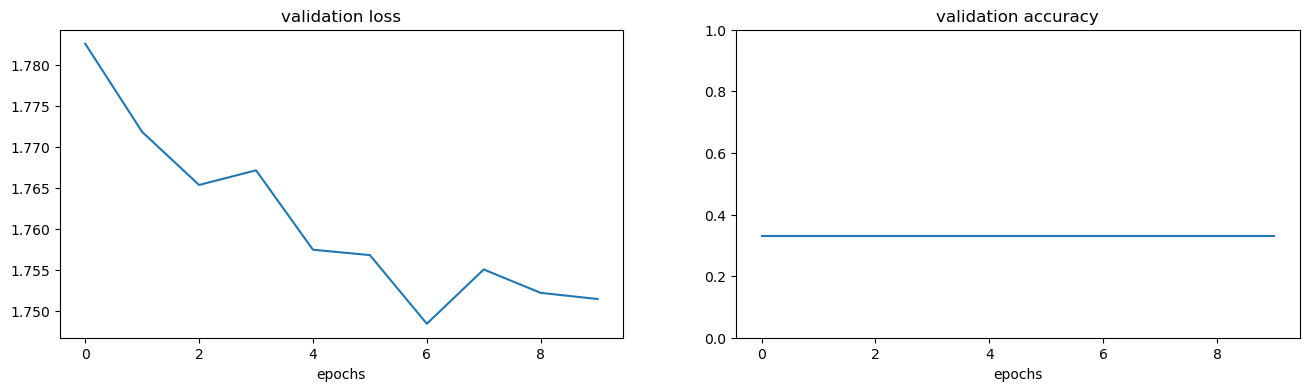

In [17]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Geting a final evaluation by running our model on the training set. Doing so, we get the following results:

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.7397844791412354
Test accuracy: 0.32814815640449524


We have achieved an accuracy of around 32%

## Transfer learning by starting with existing network

Now we can move on to the main strategy for training an image classifier on our small dataset: by starting with a larger and already trained network.

To start, we will load the VGG16 from keras, which was trained on ImageNet and the weights saved online. If this is your first time loading VGG16, you'll need to wait a bit for the weights to download from the web. Once the network is loaded, we can again inspect the layers with the `summary()` method.

In [19]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 217s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

Notice that VGG16 is _much_ bigger than the network we constructed earlier. It contains 13 convolutional layers and two fully connected layers at the end, and has over 138 million parameters, around 100 times as many parameters than the network we made above. Like our first network, the majority of the parameters are stored in the connections leading into the first fully-connected layer.

VGG16 was made to solve ImageNet, and achieves a [8.8% top-5 error rate](https://github.com/jcjohnson/cnn-benchmarks), which means that 91.2% of test samples were classified correctly within the top 5 predictions for each image. It's top-1 accuracy--equivalent to the accuracy metric we've been using (that the top prediction is correct)--is 73%. This is especially impressive since there are not just 97, but 1000 classes, meaning that random guesses would get us only 0.1% accuracy.

In order to use this network for our task, we "remove" the final classification layer, the 1000-neuron softmax layer at the end, which corresponds to ImageNet, and instead replace it with a new softmax layer for our dataset.

In terms of implementation, it's easier to simply create a copy of VGG from its input layer until the second to last layer, and then work with that, rather than modifying the VGG object directly. So technically we never "remove" anything, we just circumvent/ignore it. This can be done in the following way, by using the keras `Model` class to initialize a new model whose input layer is the same as VGG but whose output layer is our new softmax layer, called `new_classification_layer`. Note: although it appears we are duplicating this large network, internally Keras is actually just copying all the layers by reference, and thus we don't need to worry about overloading the memory.

In [20]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

We are going to retrain this network, `model_new` on the new dataset and labels. But first, we need to freeze the weights and biases in all the layers in the network, except our new one at the end, with the expectation that the features that were learned in VGG should still be fairly relevant to the new image classification task. Not optimal, but most likely better than what we can train to in our limited dataset. 

By setting the `trainable` flag in each layer false (except our new classification layer), we ensure all the weights and biases in those layers remain fixed, and we simply train the weights in the one layer at the end. In some cases, it is desirable to *not* freeze all the pre-classification layers. If your dataset has enough samples, and doesn't resemble ImageNet very much, it might be advantageous to fine-tune some of the VGG layers along with the new classifier, or possibly even all of them. To do this, you can change the below code to make more of the layers trainable.

In the case of `cats_and_dogs_filtered`, we will just do feature extraction, fearing that fine-tuning too much with this dataset may overfit. But maybe we are wrong? A good exercise would be to try out both, and compare the results.

So we go ahead and freeze the layers, and compile the new model with exactly the same optimizer and loss function as in our first network, for the sake of a fair comparison. We then run `summary` again to look at the network's architecture.

In [21]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

As before, we go ahead and train the new model, using the same hyperparameters (batch size and number of epochs) as before, along with the same optimization algorithm. We also keep track of its history as we go.

In [22]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))

Epoch 1/10
50/50 [==============================] - 1327s 27s/step - loss: 1.8420 - accuracy: 0.2932 - val_loss: 1.7540 - val_accuracy: 0.3267
Epoch 2/10
50/50 [==============================] - 1190s 24s/step - loss: 1.7104 - accuracy: 0.3163 - val_loss: 1.6952 - val_accuracy: 0.2926
Epoch 3/10
50/50 [==============================] - 3610s 73s/step - loss: 1.6952 - accuracy: 0.3086 - val_loss: 1.7317 - val_accuracy: 0.3170
Epoch 4/10
50/50 [==============================] - 1054s 21s/step - loss: 1.6698 - accuracy: 0.3138 - val_loss: 1.7020 - val_accuracy: 0.2652
Epoch 5/10
50/50 [==============================] - 1201s 24s/step - loss: 1.6561 - accuracy: 0.3144 - val_loss: 1.6957 - val_accuracy: 0.2963
Epoch 6/10
50/50 [==============================] - 1203s 24s/step - loss: 1.6489 - accuracy: 0.3130 - val_loss: 1.7292 - val_accuracy: 0.2356
Epoch 7/10
50/50 [==============================] - 1102s 22s/step - loss: 1.6616 - accuracy: 0.3032 - val_loss: 1.7942 - val_accuracy: 0.3015

Let's plot the validation loss and accuracy again, this time comparing the original model trained from scratch (in blue) and the new transfer-learned model in green.

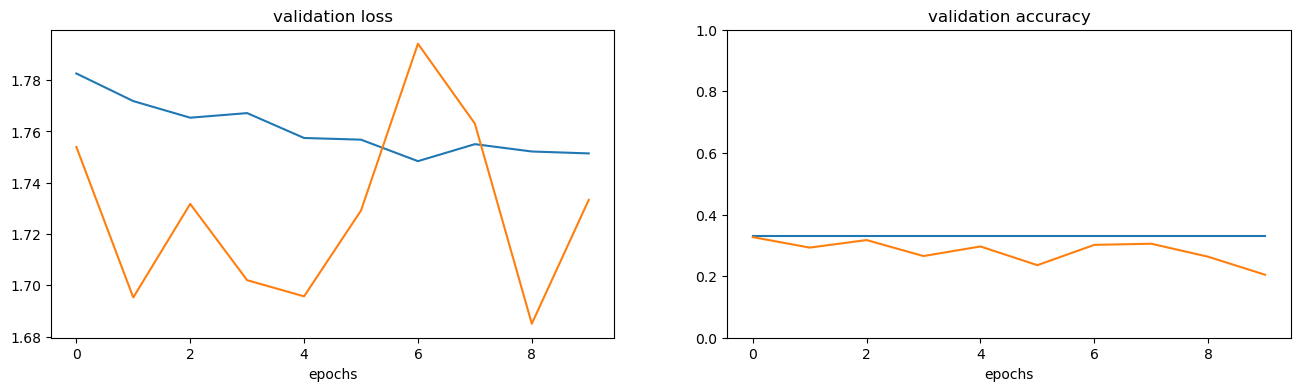

In [23]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Again, we do a final validation on the test set.

In [24]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.7262983322143555
Test accuracy: 0.21555554866790771


Notice that we don't get any improve in the accuracy, so it's not the expected result. But it's my first project with Machining Learning, so I will keep studying and get better results for it.